In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e26ff83dd82342d6b04e4ee2cca729cd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jquSalqO2KPjYu7DcjyVkaz2AOvtpPtqm1VCXqku8Kfh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e26ff83dd82342d6b04e4ee2cca729cd.get_object(Bucket='mlr-donotdelete-pr-mcquuupmzu4aj5',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset= pd.read_csv(body)
dataset.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


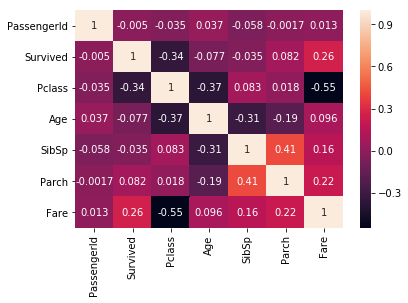

In [3]:
sns.heatmap(dataset.corr(),annot=True)

In [4]:
dataset=dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

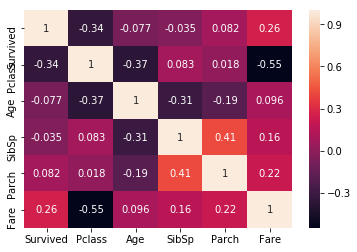

In [5]:
sns.heatmap(dataset.corr(),annot=True)

In [6]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [7]:
dataset.fillna(dataset.mean(),inplace=True)

In [8]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [11]:
y=dataset.iloc[:,0].values
x=dataset.iloc[:,1:].values

In [12]:
lc=LabelEncoder()

In [13]:
x[:,1]=lc.fit_transform(x[:,1])
x[:,-1]=lc.fit_transform(x[:,-1])

In [14]:
one=OneHotEncoder(categorical_features=[-1])

In [15]:
x=one.fit_transform(x).toarray()

In [16]:
x=x[:,1:]

In [17]:
#0,1 = S
#0,0 = C
#1,0 = Q

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

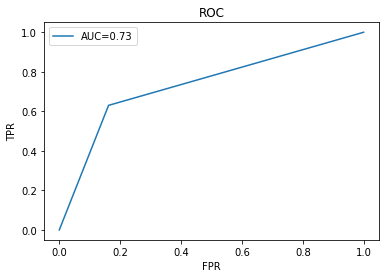

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

In [20]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.1.13)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not di

In [21]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-23 14:12:30,803 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [22]:
wml_credential={
    "instance_id": "f4371351-22cc-4f6d-87cc-73c2cc3afc56",
    "password": "133a16db-7212-4bf6-8e09-7fc553a1fbda",
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "username": "fce5adfa-eaea-4a12-9e80-42350ae2d473",
    "apikey": "tpN9VTIZ_DNXmVqBpqB8vId5VT6OW_r0crljs12bW2im"
}

In [23]:
client=WatsonMachineLearningAPIClient(wml_credential)

In [24]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "abc", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "abc", 
               client.repository.ModelMetaNames.NAME: "MyModel"}

In [26]:
model_artifact=client.repository.store_model(dt, meta_props=model_props)

In [27]:
client.repository.list()

------------------------------------  ------------  ------------------------  -----------------  -----------------
GUID                                  NAME          CREATED                   FRAMEWORK          TYPE
7178a88e-2be8-461c-9c75-b6d1bc385228  MyModel       2019-06-23T14:12:31.378Z  scikit-learn-0.19  model
195d23c2-2440-459b-a12b-cb5d7ea026fc  MyModel       2019-06-21T10:54:34.408Z  scikit-learn-0.19  model
8c331990-276f-489d-ae12-779d0023731f  MyModel       2019-06-21T05:17:33.831Z  scikit-learn-0.19  model
57a1df99-45d2-414b-b92a-7e755a3117e1  MyModel       2019-06-21T05:14:57.145Z  scikit-learn-0.19  model
567db704-0365-4798-a57d-923751dbc5f6  MyDeployment  2019-06-21T10:55:17.727Z  scikit-learn-0.19  online deployment
85021e1f-363f-4974-be3f-131cf36f8e9e  MyDeployment  2019-06-21T05:17:38.134Z  scikit-learn-0.19  online deployment
ebd233b5-2403-4cfa-8eb3-0da811fda286  MyDeployment  2019-06-21T05:16:23.284Z  scikit-learn-0.19  online deployment
--------------------------

In [28]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [29]:
created_deployment = client.deployments.create(published_model_uid, name="MyDeployment")



#######################################################################################

Synchronous deployment creation for uid: '7178a88e-2be8-461c-9c75-b6d1bc385228' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='264325ff-a5dd-4d95-9880-db948c9bbdc4'
------------------------------------------------------------------------------------------------




In [30]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f4371351-22cc-4f6d-87cc-73c2cc3afc56/deployments/264325ff-a5dd-4d95-9880-db948c9bbdc4/online
